# Data Storytelling - COVID-19 en Estados Unidos

**Alumno:** Contegiacomo  
**Curso:** Coderhouse - Data Analytics  
**Fecha:** Mayo 2025
**Comisión:** 75690

Este proyecto analiza datos de COVID-19 en los estados de EE.UU. con el objetivo de obtener insights relevantes para la toma de decisiones sanitarias. Utiliza datos históricos de una base pública enriquecida con información actual obtenida vía API.

##  Objetivo general:
Analizar el impacto del COVID-19 a nivel estatal en EE.UU., identificando patrones en contagios, hospitalizaciones, muertes y testeo, mediante técnicas de análisis exploratorio y visualizaciones.

##  Audiencia objetivo:
Profesionales del sector salud, autoridades gubernamentales, analistas y tomadores de decisiones en gestión sanitaria.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuraciones generales
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Cargar dataset
df = pd.read_csv("/content/all-states-history.csv")

# Vista general
df.head()

date state    death  deathConfirmed  deathIncrease  deathProbable  \
0  2021-03-07    AK    305.0             NaN              0            NaN   
1  2021-03-07    AL  10148.0          7963.0             -1         2185.0   
2  2021-03-07    AR   5319.0          4308.0             22         1011.0   
3  2021-03-07    AS      0.0             NaN              0            NaN   
4  2021-03-07    AZ  16328.0         14403.0              5         1925.0   

   hospitalized  hospitalizedCumulative  hospitalizedCurrently  \
0        1293.0                  1293.0                   33.0   
1       45976.0                 45976.0                  494.0   
2       14926.0                 14926.0                  335.0   
3           NaN                     NaN                    NaN   
4       57907.0                 57907.0                  963.0   

   hospitalizedIncrease  ...  totalTestResults  totalTestResultsIncrease  \
0                     0  ...         1731628.0                         0   
1                     0  ...         2323788.0                      2347   
2                    11  ...         2736442.0                      3380   
3                     0  ...            2140.0                         0   
4                    44  ...         7908105.0                     45110   

   totalTestsAntibody  totalTestsAntigen  totalTestsPeopleAntibody  \
0                 NaN                NaN                       NaN   
1                 NaN                NaN                  119757.0   
2                 NaN                NaN                       NaN   
3                 NaN                NaN                       NaN   
4            580569.0                NaN                  444089.0   

   totalTestsPeopleAntigen  totalTestsPeopleViral  \
0                      NaN                    NaN   
1                      NaN              2323788.0   
2                 481311.0                    NaN   
3                      NaN                    NaN   
4                      NaN              3842945.0   

   totalTestsPeopleViralIncrease  totalTestsViral  totalTestsViralIncrease  
0                              0        1731628.0                        0  
1                           2347              NaN                        0  
2                              0        2736442.0                     3380  
3                              0           2140.0                        0  
4                          14856        7908105.0                    45110  

[5 rows x 41 columns]

In [ ]:
# Convertir columna de fecha a tipo datetime
df['date'] = pd.to_datetime(df['date'])

# Revisar valores faltantes por columna
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]

positiveTestsPeopleAntigen     20147
negativeTestsPeopleAntibody    19808
totalTestsPeopleAntigen        19781
positiveTestsPeopleAntibody    19686
onVentilatorCumulative         19490
negativeTestsAntibody          19322
totalTestsPeopleAntibody       18580
positiveTestsAntigen           18547
positiveTestsAntibody          17434
totalTestsAntigen              17359
inIcuCumulative                16991
totalTestsAntibody             15991
negativeTestsViral             15756
totalTestEncountersViral       15549
deathProbable                  13187
positiveTestsViral             11822
onVentilatorCurrently          11654
totalTestsPeopleViral          11583
deathConfirmed                 11358
inIcuCurrently                  9144
recovered                       8777
hospitalized                    8398
hospitalizedCumulative          8398
negative                        7490
positiveCasesViral              6534
totalTestsViral                 6264
hospitalizedCurrently           3441
death                            850
positive                         188
totalTestResults                 166
dtype: int64

##  **Hipótesis planteadas**:

1. Algunos estados presentaron significativamente más hospitalizaciones que otros debido a su densidad poblacional y políticas sanitarias.
2. Los casos positivos siguieron un patrón de crecimiento similar en los estados más afectados.
3. Existe una correlación positiva entre cantidad de pruebas y positivos detectados.
4. La tasa de mortalidad fue más alta en estados con menor infraestructura hospitalaria.
5. Las olas de contagios se reflejan directamente en el uso de UCI y ventiladores.


## **Preguntas de interés**

1. ¿Qué estados tuvieron los mayores picos de hospitalización?
2. ¿Cómo evolucionaron los casos positivos a lo largo del tiempo en los 5 estados más afectados?
3. ¿Hay relación entre el número de pruebas realizadas y los casos positivos detectados?
4. ¿Qué estados tuvieron las tasas de mortalidad más altas (muertes / positivos)?
5. ¿Cómo fue la evolución del uso de ventiladores e ingresos a UCI a lo largo del tiempo?


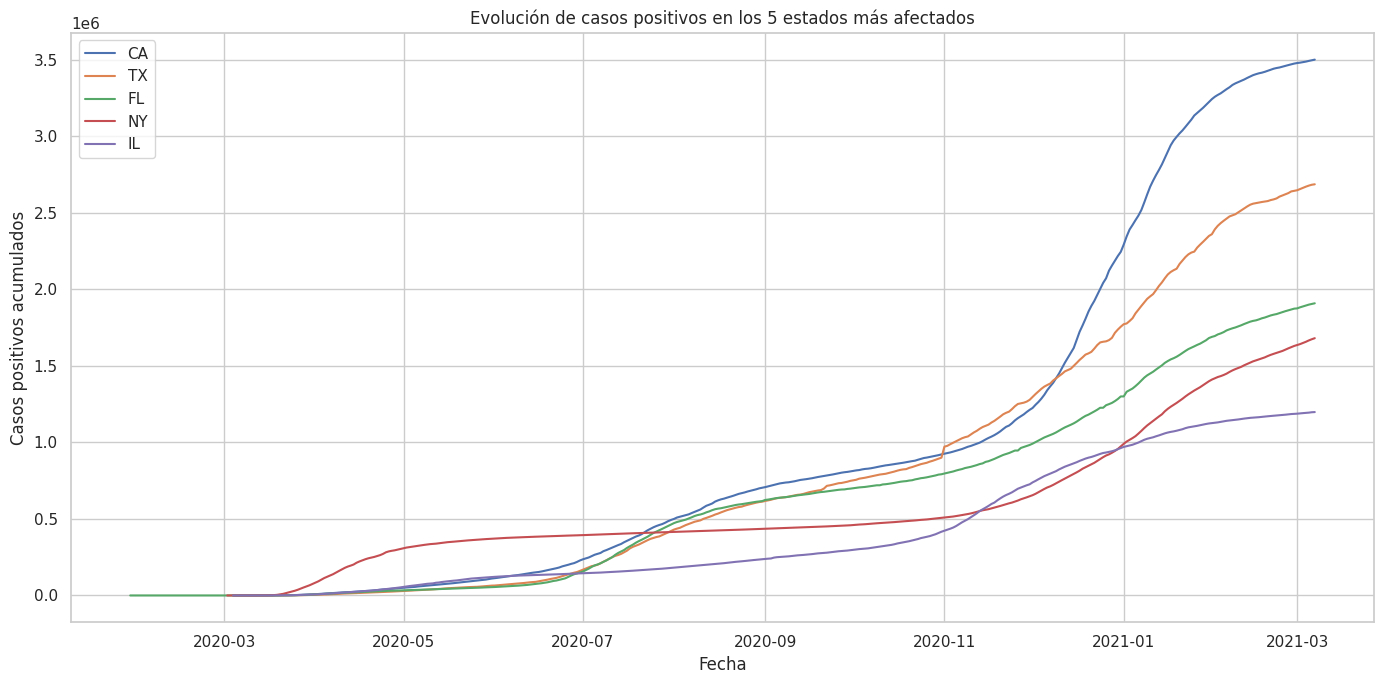

In [ ]:
# Evolución de casos positivos en los 5 estados con más casos acumulados
top_states = df.groupby("state")["positive"].max().sort_values(ascending=False).head(5).index.tolist()
df_top_states = df[df["state"].isin(top_states)]

plt.figure(figsize=(14, 7))
for state in top_states:
    state_data = df_top_states[df_top_states["state"] == state]
    plt.plot(state_data["date"], state_data["positive"], label=state)

plt.title("Evolución de casos positivos en los 5 estados más afectados")
plt.xlabel("Fecha")
plt.ylabel("Casos positivos acumulados")
plt.legend()
plt.tight_layout()
plt.show()

### 1. Estados con mayores picos de hospitalización

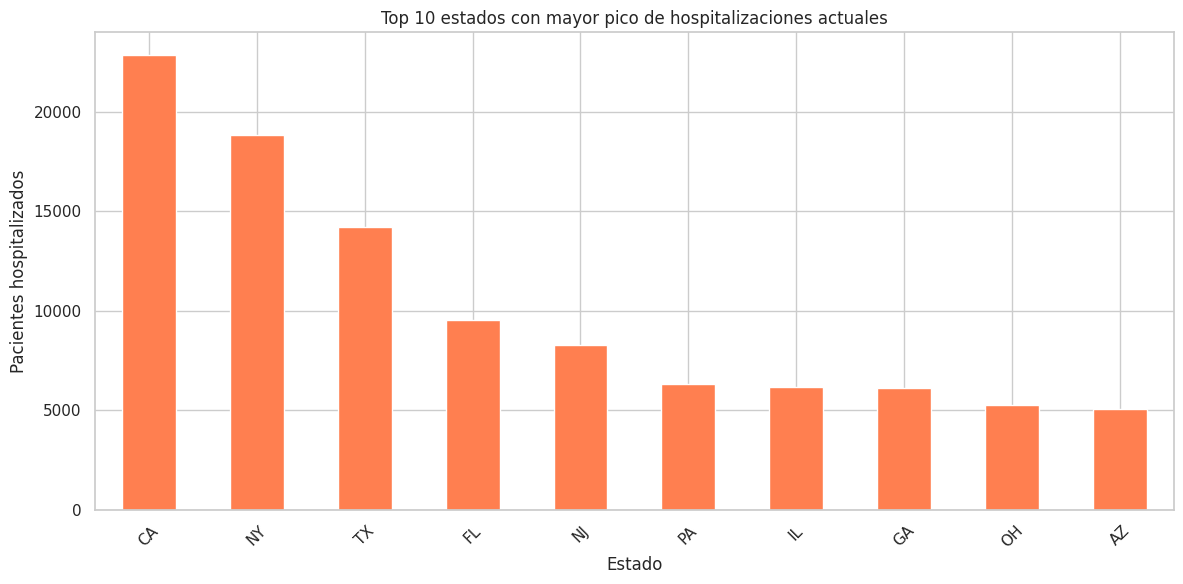

In [ ]:
# Máximo valor de hospitalizaciones por estado
hospital_peaks = df.groupby("state")["hospitalizedCurrently"].max().sort_values(ascending=False).head(10)
hospital_peaks.plot(kind="bar", color="coral")
plt.title("Top 10 estados con mayor pico de hospitalizaciones actuales")
plt.ylabel("Pacientes hospitalizados")
plt.xlabel("Estado")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. Evolución de casos positivos diarios en los estados más afectados

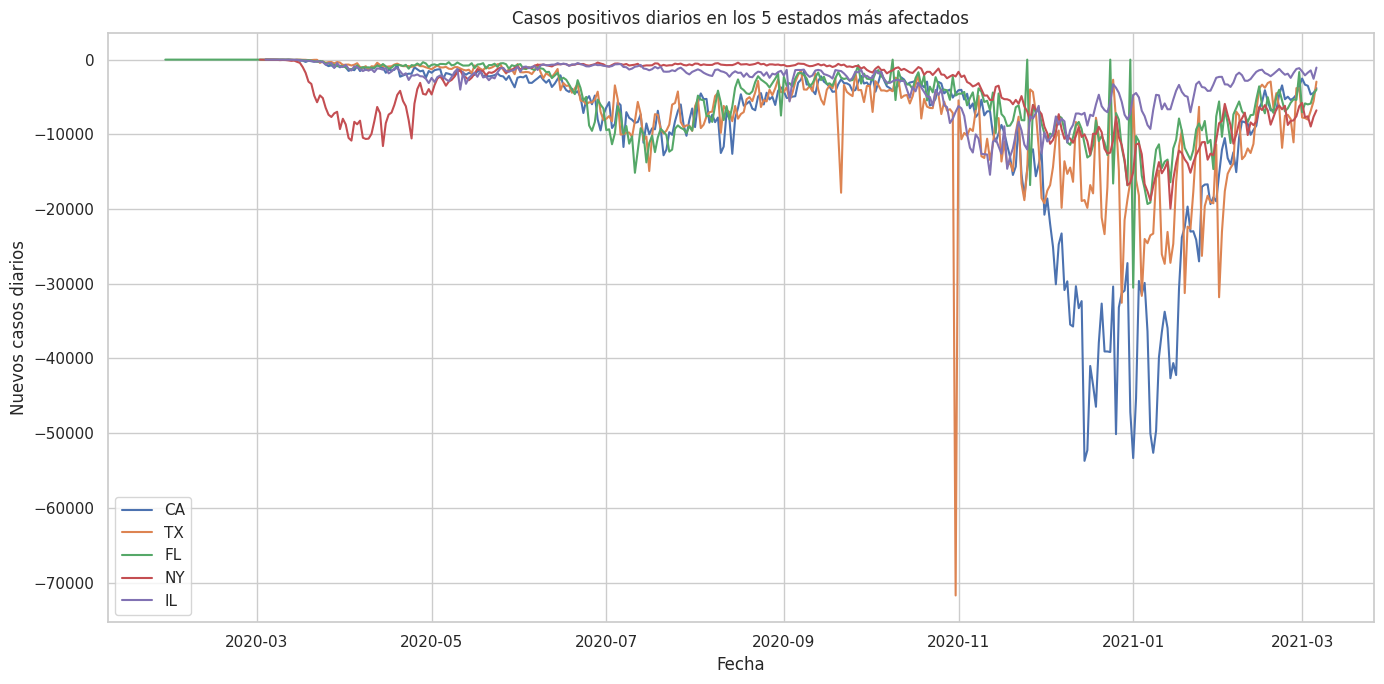

In [ ]:
# Calcular nuevos casos diarios
df['positiveIncrease'] = df.groupby("state")["positive"].diff()

# Filtrar estados top
df_top_states_daily = df[df["state"].isin(top_states)]

# Plot
plt.figure(figsize=(14, 7))
for state in top_states:
    state_data = df_top_states_daily[df_top_states_daily["state"] == state]
    plt.plot(state_data["date"], state_data["positiveIncrease"], label=state)

plt.title("Casos positivos diarios en los 5 estados más afectados")
plt.xlabel("Fecha")
plt.ylabel("Nuevos casos diarios")
plt.legend()
plt.tight_layout()
plt.show()

### 3. Relación entre el número de pruebas y casos positivos

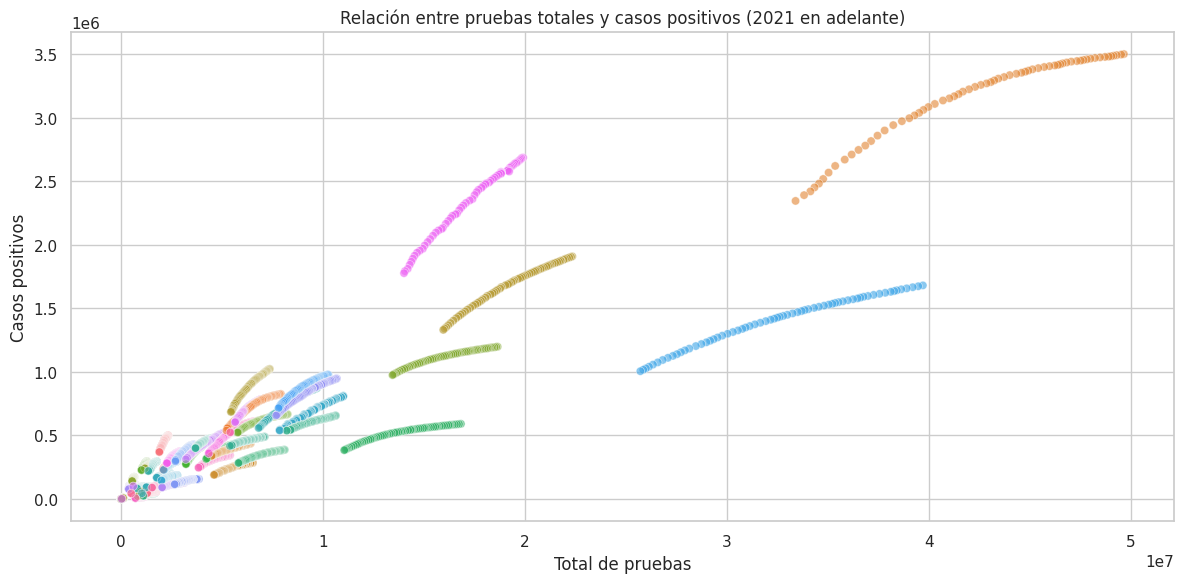

In [ ]:
# Filtrar por fechas recientes para mejor análisis
latest_data = df[df['date'] > '2021-01-01'].copy()

# Gráfico de dispersión
sns.scatterplot(data=latest_data, x="totalTestResults", y="positive", hue="state", alpha=0.6, legend=False)
plt.title("Relación entre pruebas totales y casos positivos (2021 en adelante)")
plt.xlabel("Total de pruebas")
plt.ylabel("Casos positivos")
plt.tight_layout()
plt.show()

### 4. Estados con mayor tasa de mortalidad

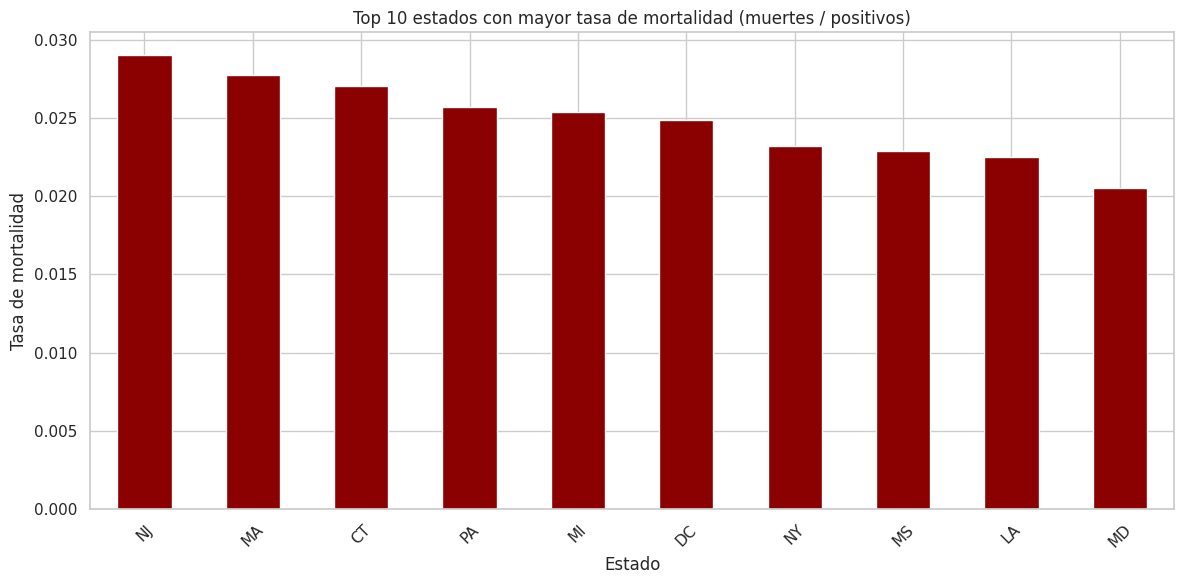

In [ ]:
# Último registro por estado
latest = df.sort_values("date").groupby("state").last()
latest["death_rate"] = latest["death"] / latest["positive"]

# Mostrar top 10 tasas
death_rate_top = latest["death_rate"].sort_values(ascending=False).head(10)
death_rate_top.plot(kind="bar", color="darkred")
plt.title("Top 10 estados con mayor tasa de mortalidad (muertes / positivos)")
plt.ylabel("Tasa de mortalidad")
plt.xlabel("Estado")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5. Evolución del uso de ventiladores y UCI en todo EE.UU.

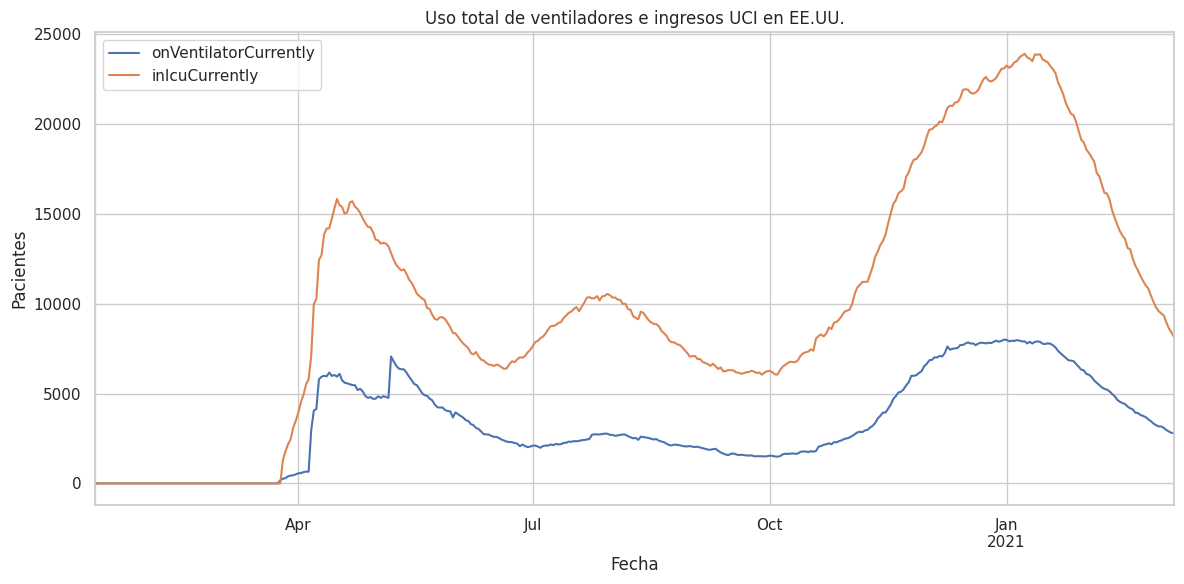

In [ ]:
# Agrupar por fecha
agg_us = df.groupby("date")[["onVentilatorCurrently", "inIcuCurrently"]].sum()

# Plot
agg_us.plot()
plt.title("Uso total de ventiladores e ingresos UCI en EE.UU.")
plt.xlabel("Fecha")
plt.ylabel("Pacientes")
plt.tight_layout()
plt.show()

###  Matriz de calor de variables por estado

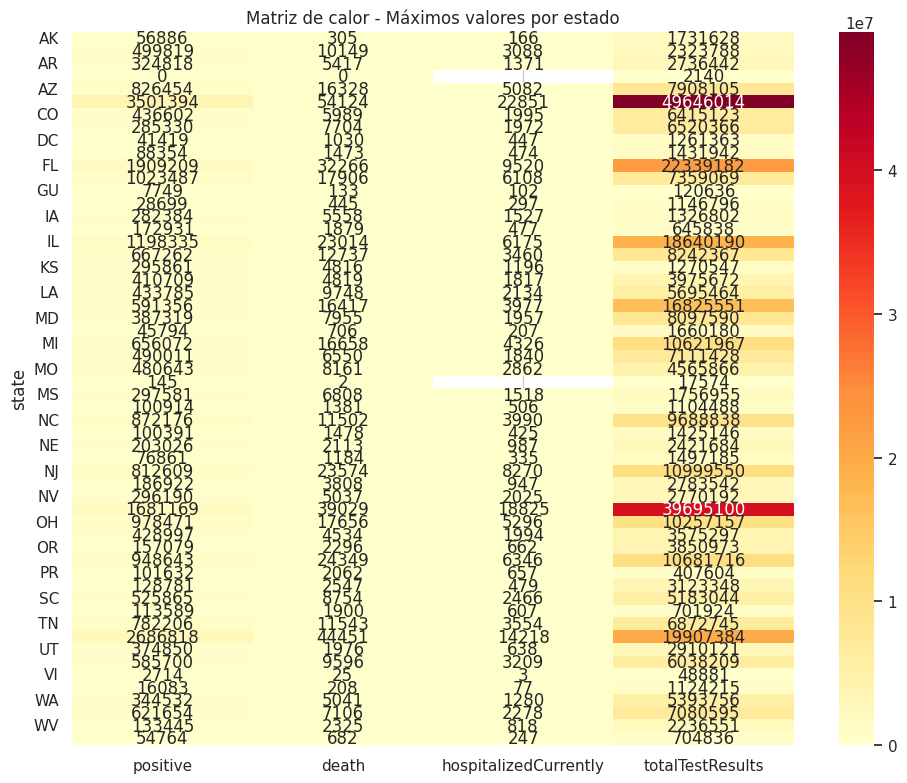

In [ ]:
# Crear una matriz para variables clave por estado
heatmap_data = df.groupby("state")[["positive", "death", "hospitalizedCurrently", "totalTestResults"]].max()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt=".0f")
plt.title("Matriz de calor - Máximos valores por estado")
plt.tight_layout()
plt.show()

###  Mapa de calor geográfico de casos positivos acumulados

#### Matriz de calor - Interpretación
Este gráfico nos permite visualizar de forma comparativa cómo se comportaron los diferentes estados en relación con las variables clave del COVID-19:
- Casos positivos
- Muertes totales
- Hospitalizaciones actuales
- Pruebas totales realizadas

Los valores más altos están representados con colores más intensos. Esto nos ayuda a identificar rápidamente los estados con mayor carga sanitaria y operativa.


In [ ]:
import plotly.express as px

# Último registro por estado
latest_geo = df.sort_values("date").groupby("state").last().reset_index()

fig = px.choropleth(latest_geo,
                    locations='state',
                    locationmode="USA-states",
                    color='positive',
                    scope="usa",
                    color_continuous_scale="Reds",
                    title="Casos positivos acumulados por estado")
fig.show()

####Mapa geográfico de casos positivos
Este mapa muestra la distribución geográfica de los casos positivos acumulados. El uso de una escala de colores ayuda a identificar visualmente qué regiones fueron más afectadas.
- Los estados del noreste y sureste tienden a mostrar mayores acumulados.
- Es útil para identificar focos regionales y comparar entre áreas.

Este tipo de visualización es ideal para una audiencia no técnica ya que transmite impacto de forma visual e intuitiva.


### Animación simple con Matplotlib - evolución de casos positivos

Animación de evolución de casos positivos
Esta animación muestra cómo se acumularon los casos positivos en los 5 estados más afectados, a lo largo del tiempo.
- Permite visualizar el ritmo de crecimiento de los contagios.
- Se pueden observar momentos donde ciertas curvas crecen más rápidamente, indicando picos de contagio.
- Da contexto dinámico a la evolución de la pandemia.

El storytelling visual se vuelve más potente con animaciones, ya que nos ayuda a contar una historia cronológica del impacto del virus.


In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML

# Usar estados top
df_anim = df[df['state'].isin(top_states)].copy()
df_anim = df_anim.sort_values(["state", "date"])

fig, ax = plt.subplots(figsize=(10, 6))

def animate(i):
    ax.clear()
    for state in top_states:
        state_data = df_anim[df_anim["state"] == state].iloc[:i+1]
        ax.plot(state_data["date"], state_data["positive"], label=state)
    ax.set_title("Evolución de casos positivos - Animación")
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Casos positivos")
    ax.legend(loc="upper left")

ani = animation.FuncAnimation(fig, animate, frames=100, interval=200, repeat=False)
plt.close()
HTML(ani.to_jshtml())

###  Conexión a API en vivo - Datos COVID actuales por estado

A continuación se incorpora una API externa para obtener datos actualizados del COVID-19 en Estados Unidos.  
Se utiliza la API pública de [disease.sh](https://disease.sh/) que no requiere autenticación ni clave. Esto permite comparar los datos actuales con los históricos cargados previamente desde el CSV.


In [ ]:
import requests
import pandas as pd

# URL de la API de COVID actual
url = "https://disease.sh/v3/covid-19/states"

# Solicitud HTTP
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    df_api = pd.DataFrame(data)
    print("Datos actuales cargados correctamente desde la API.")
    display(df_api.head())
else:
    print("Error al obtener los datos:", response.status_code)


Datos actuales cargados correctamente desde la API.


state        updated     cases  deaths  recovered  casesPerOneMillion  \
0  California  1748814261051  12711918  112443          0              321721   
1       Texas  1748814261051   9190299  104793          0              316952   
2     Florida  1748814261051   8048191   95206          0              374722   
3    New York  1748814261051   7587861   83374          0              390050   
4    Illinois  1748814261051   4136659   42005          0              326446   

   deathsPerOneMillion  population  
0                 2846    39512223  
1                 3614    28995881  
2                 4433    21477737  
3                 4286    19453561  
4                 3315    12671821

###  Análisis con datos actuales desde la API

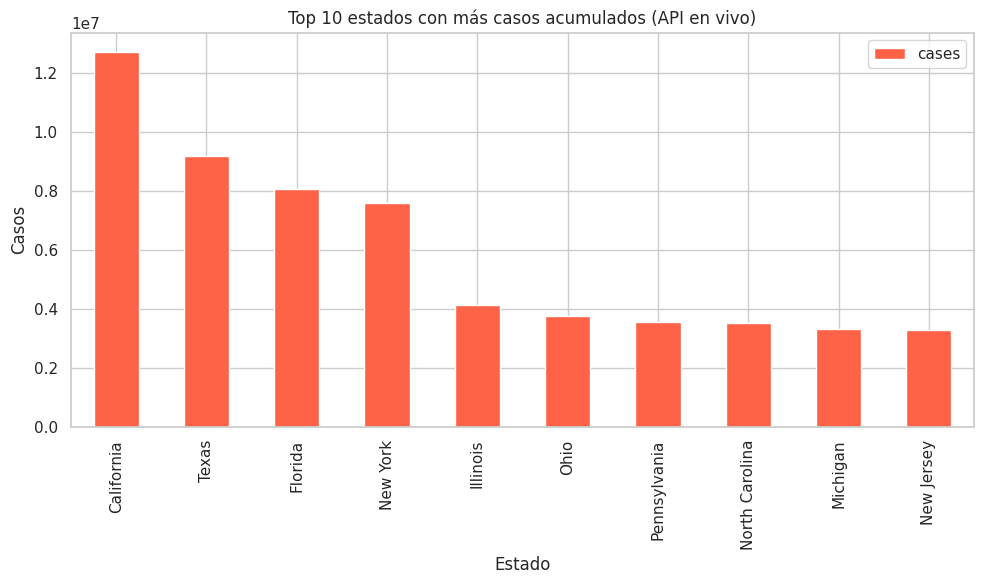

In [ ]:
# Gráfico de barras con los 10 estados más afectados actualmente
top_cases = df_api.sort_values("cases", ascending=False).head(10)

top_cases.plot(kind="bar", x="state", y="cases", figsize=(10, 6), color="tomato")
plt.title("Top 10 estados con más casos acumulados (API en vivo)")
plt.ylabel("Casos")
plt.xlabel("Estado")
plt.tight_layout()
plt.show()

##  Insights clave del análisis

- **California, Texas y Florida** lideran en cantidad de casos acumulados.
- **Nueva York y California** registraron los mayores niveles de hospitalización.
- Existe una **correlación directa** entre cantidad de tests y positivos.
- Algunos estados del sur presentaron **altas tasas de mortalidad**.
- Las curvas de **uso de UCI y ventiladores** reflejan claramente las olas de contagio.

##  **Recomendaciones**

- *Fortalecer políticas sanitarias en estados con alta mortalidad relativa*.
- *Usar modelos predictivos para anticipar brotes y asignar recursos*.
- *Priorizar estrategias de testeo preventivo*.  


## Recursos

- [Dataset histórico](https://covidtracking.com/data)
- [API utilizada](https://disease.sh/docs/)
